### Importing required libraries

In [ ]:
import numpy as np                                                        # For pre-preocessing data
import pandas as pd                                                       # For pre-preocessing data
import matplotlib.pyplot as plt                                           # For visualisation
import seaborn as sns                                                     # For visualisation
from sklearn.metrics import classification_report,confusion_matrix        # For Performance metrics 
from sklearn.model_selection import cross_validate                        # For cross validation scores
from sklearn.model_selection import cross_val_score                       # For cross validation scores
from sklearn.metrics import confusion_matrix                              # For confusion matrixes
import os                                                                 # For changing home directory
from sklearn.model_selection import train_test_split                      # For train test split

'''
Although we have already imported all the necesssary libraries here, 
we will again import these in this notebook again whereever they are used just to show in which step these are used.
In a real scenario, we don't need to import again and again 
'''

"\nAlthough we have already imported all the necesssary libraries here, \nwe will again import these in this notebook again whereever they are used just to show in which step these are used.\nIn a real scenario, we don't need to import again and again \n"

### Changing Home directory

In [ ]:
print('Current working directory is ----    '+ os.getcwd())
os.chdir("D:\\Relevel\\Week 14_Day3\\Data Files")
print('Changed working directory is ----    '+ os.getcwd())

Current working directory is ----    D:\Relevel\Week 14_Day3
Changed working directory is ----    D:\Relevel\Week 14_Day3\Data Files


### Reading CSV data file 

The file contains characteristics data about 3168 voice samples for Males and Females.
There are 20 Features and 1 Target variable
Target variable is binary - Male/Female


In [ ]:
voice = pd.read_csv("D:\\Relevel\\Week 14_Day3\\Data Files\\voice.csv")
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


### Objective 

The Objective of this exercise is to train a model which predicts whether a voice sample belongs to a Male or a Female


### Exploring data 

In [ ]:
voice.shape

(3168, 21)

In [ ]:
voice.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [ ]:
voice.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477


### Checking Null values and data types

In [ ]:
voice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

Conclusion - There are no null values

### Replacing Target Variable values with 0 and 1 because this binary forms is compatible with most algorithms

In [ ]:
voice.label = [1 if each == "female" else 0 for each in voice.label]

In [ ]:
voice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   int6

Observation - The Target variable datatype has changed to int64

### Preparing Test and Train data 

Segregating Target variable and features into x and y 

In [ ]:
#We should have x and y values for test-train datas.
y = voice.label.values
x = voice.drop(["label"],axis=1)

#### Performing Train test split finally with 80/20 ratio. 

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_normalised,y,test_size=0.2,random_state = 100)
#test_size=0.2 means %20 test datas, %80 train datas


# 1. Logistic Regression

Training our Logistic Regresion model using  LogisticRegression() function of sklearn library. 

For students to explore - GridSearchCV is used for Hyperparameter tuning and Cross Validation. 

Also in logistic regression function , C-Value has following significance --

C -Value : Strength of regularisation. A high value of C gives more weight to training data. A lower C value means that the data might not represent real world data and less importance is given to data. The ideal value is usually found as per an iterative process or via  GridSearchCV function 


In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C=100, random_state=0)
log_reg = log_reg.fit(x_train,y_train)
log_reg


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100, random_state=0)

##### Predicting Target for Test Feature set and displaying the output 

In [ ]:
y_pred_test = log_reg.predict(x_test)
y_pred_test

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,

##### P Values associated with each prediction can also be checked using predict_proba function

In [ ]:
# Probability values given by Logistic regression algorythm

log_reg.predict_proba(x_test)[:,0]

array([9.96181259e-01, 9.85574169e-01, 9.94907880e-01, 1.26343139e-04,
       1.24233757e-03, 1.85442402e-05, 2.79274832e-02, 2.03090459e-02,
       9.81738401e-01, 9.57129014e-01, 9.95632141e-01, 1.43056862e-04,
       8.31410299e-01, 7.04206379e-03, 1.00691302e-01, 4.99837339e-02,
       6.81131823e-04, 9.97203528e-01, 9.97377075e-01, 8.38780357e-05,
       9.99018832e-01, 3.21971470e-07, 1.19663101e-03, 1.63671206e-03,
       8.09851007e-01, 9.94487345e-01, 9.99546036e-01, 9.94019281e-01,
       2.42151664e-05, 9.95989192e-01, 8.88114487e-01, 7.68860811e-04,
       8.49965417e-04, 3.10299971e-05, 8.87694012e-04, 6.39041212e-02,
       7.88198899e-04, 8.11857285e-01, 2.72210010e-01, 9.96396049e-01,
       1.09452536e-04, 9.99498773e-01, 9.99095730e-01, 8.25848242e-01,
       2.50542984e-05, 1.39359410e-02, 9.20939180e-01, 1.10696961e-01,
       2.43691341e-07, 9.98102381e-01, 9.91765406e-01, 1.16996036e-03,
       9.96220963e-01, 3.72963422e-04, 7.59727631e-02, 9.92051170e-01,
      

### Model Predictions and Performance Evaluation

sklearn.metrics library of sklearn provides a lot of useful performance metrics
accuracy_score is one of them to calculate accuracy 

### 1. Accuracy

##### Accuracy for Test Set

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score ( Test set ): {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score ( Test set ): 0.9637


##### Predictions & Accuracy for Test Set

In [ ]:
y_pred_train = log_reg.predict(x_train)

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9755


Since both train and test accuracies are comparable and close to each other, we can conclude that model is not overfitted.

### 2. Confusion Matrix

The confusion matrix can be plotted as per below code - 

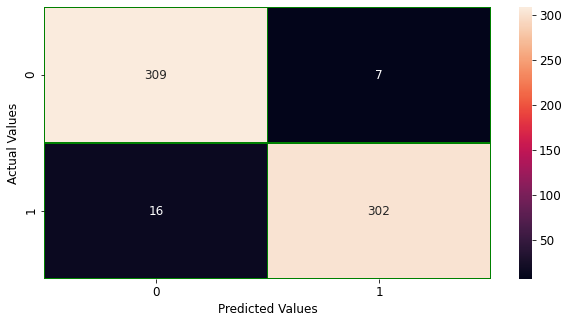

In [ ]:
conf_mat = confusion_matrix(y_test,y_pred_test)                                       # Getting confusuion matrix 

#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="green",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

### 3. Precision, Recall an F1 Score

classification_report is a very useful function which provides all the metrics in one go 

In [ ]:
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       316
           1       0.98      0.95      0.96       318

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634



### 3. ROC AUC

Again, using sklearn.metrics's roc_curve function, the required data to plot ROC and calculate AUC can be obtained

In [ ]:
# Calculating data required to plot ROC

from sklearn.metrics import roc_curve


y_pred1 = log_reg.predict_proba(x_test)[:,1]
y_pred1 = y_pred1.reshape(-1,1)

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 1)

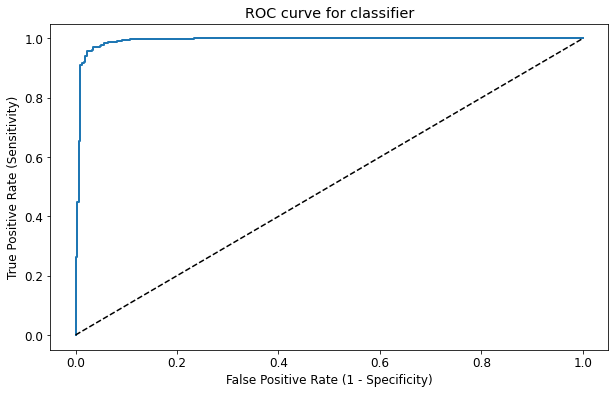

In [ ]:
### Plotting ROC

plt.figure(figsize=(10,6))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

##### Area under the ROC 

In [ ]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9918


Since AUC is very close to 1, it can be concluded that model can almost perfectly classify postive & negative class.